In [2]:
import pandas as pd
from prophet import Prophet

In [5]:
dataframe = pd.read_csv('../data/processed/pc_sums.csv', index_col=0)
dataframe.index = pd.to_datetime(dataframe.index)

products = dataframe.columns[1:-1]

In [9]:
product_df = dataframe[products[0]]
product_df.index = pd.to_datetime(product_df.index)

In [14]:
# prophet columns: ds, y --> index, value
product_df = product_df.reset_index()
product_df.columns = ['ds', 'y']

In [19]:
product_df

,ds,y
0,2020-01-03,761.685
1,2020-01-04,0.000
2,2020-01-05,0.000
3,2020-01-06,0.000
4,2020-01-07,764.643
...,...,...
1353,2023-09-17,0.000
1354,2023-09-18,521.000
1355,2023-09-19,474.000
1356,2023-09-20,491.000


In [16]:
# initiate prophet app
m = Prophet()
m.fit(product_df)

13:42:12 - cmdstanpy - INFO - Chain [1] start processing
13:42:13 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods=3)

In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1356,2023-09-20,343.818607,-349.191668,1055.991563
1357,2023-09-21,329.883350,-407.330780,1028.115554
1358,2023-09-22,581.718020,-194.080967,1281.080286
1359,2023-09-23,-104.575163,-824.426936,606.504301
1360,2023-09-24,-265.327124,-977.143802,470.918828


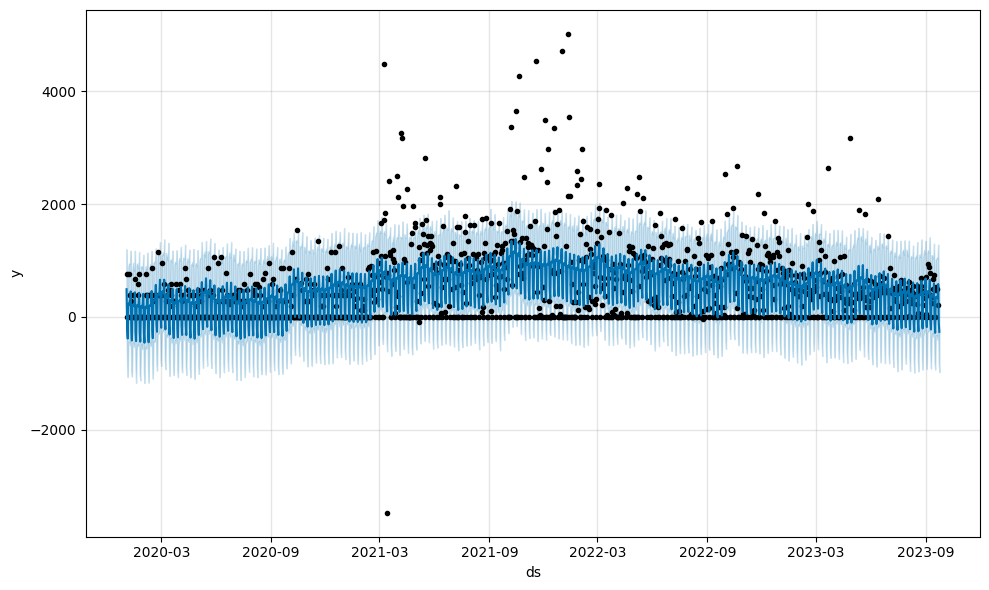

In [28]:
fig1 = m.plot(forecast)

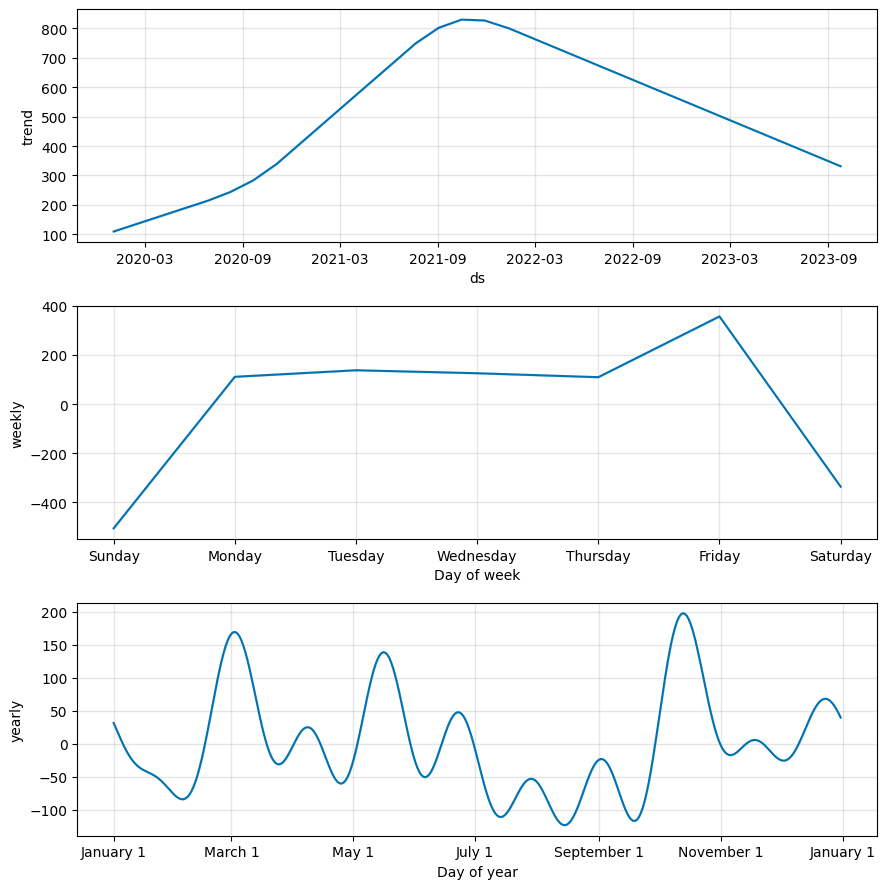

In [29]:
fig2 = m.plot_components(forecast)

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)